<a href="https://colab.research.google.com/github/NamithaAnnesTom/Deep-Learning-Works/blob/main/ArtificialNeuralNetworks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DIABETES PREDICTION USING ANN***

***IMPORTING LIBRARIES***

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

***LOADING THE DATASET***

In [35]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
df.drop_duplicates(inplace=True)

***INPUT AND OUTPUT SEPERATIONt***

In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

***SPLITTING THE DATASET FOR TRAINING AND TESTING***

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

***NORMALISATION***

In [40]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

***MODEL CREATION***

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


This is using the Sequential model, which is a linear stack of layers. It is a simple and straightforward way to build a neural network layer by layer. In this definition:

The first layer (Dense(12, input_shape=(8,), activation='relu')) has 12 neurons, expects input with 8 features, and uses the ReLU activation function.
The second layer (Dense(8, activation='relu')) has 8 neurons with ReLU activation.
The third layer (Dense(1, activation='sigmoid')) has 1 neuron with a sigmoid activation function, suitable for binary classification.

***MODEL COMPILATION***

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

***MODEL TRAINING***

In [43]:
history = model.fit(x_train,y_train,epochs=150,batch_size=10,validation_split=0.2)

Epoch 1/150
43/43 [==============================] - 1s 8ms/step - loss: 0.5813 - accuracy: 0.7156 - val_loss: 0.5631 - val_accuracy: 0.7037
Epoch 2/150
43/43 [==============================] - 0s 4ms/step - loss: 0.5450 - accuracy: 0.7366 - val_loss: 0.5379 - val_accuracy: 0.7037
Epoch 3/150
43/43 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7529 - val_loss: 0.5246 - val_accuracy: 0.7130
Epoch 4/150
43/43 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.7506 - val_loss: 0.5129 - val_accuracy: 0.7130
Epoch 5/150
43/43 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7669 - val_loss: 0.5051 - val_accuracy: 0.7130
Epoch 6/150
43/43 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7646 - val_loss: 0.4987 - val_accuracy: 0.7222
Epoch 7/150
43/43 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7786 - val_loss: 0.4940 - val_accuracy: 0.7500
Epoch 8/150
4

***MODEL EVALUATION***

In [44]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
test_loss,test_accuracy

8/8 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.7229


(0.6803669929504395, 0.7229437232017517)

***MODEL PREDICTION***

In [47]:
y_pred = (model.predict(x_test)>0.5).astype(int)

8/8 [==============================] - 0s 3ms/step


In [53]:
# Assuming y_test is a pandas Series or DataFrame
for i in range(5):
    print(f'Input: {x_test[i].tolist()} => Prediction: {y_pred[i]} (Actual: {y_test.iloc[i]})')


Input: [0.5233871535231085, -0.7394464383735766, -0.4446003080737151, 0.7200419689830563, 0.9560667489737066, 0.23273334266078452, -0.15228197610461225, 0.7860505049424569] => Prediction: [1] (Actual: 0)
Input: [-0.5909209797841547, -0.28934860632009524, 0.32999836530937293, 0.6611224879929444, -0.6910430646727049, 0.43377686149688327, -1.0773055202492086, -1.0590805186684285] => Prediction: [0] (Actual: 0)
Input: [-0.5909209797841547, -0.4179479869068042, -0.17121254099733108, -1.2243009036906376, -0.6910430646727049, -0.14570151632481237, -1.0445032669107477, -1.0590805186684285] => Prediction: [0] (Actual: 0)
Input: [1.0805412201767401, -0.4500978320534814, 0.5578215045396929, -1.2243009036906376, -0.6910430646727049, -0.8789190556094064, 1.2450940161138204, 0.03122417710164011] => Prediction: [0] (Actual: 0)
Input: [0.8019641868499243, 0.4822476772001587, 1.013467783000333, -1.2243009036906376, -0.6910430646727049, -0.2521363204145118, -0.8739315495507514, 1.3731376488186475] => Pr

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(classification_report(y_test,y_pred))

[[121  30]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       151
           1       0.61      0.57      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



***PLOTTING OF LOSS AND ACCURACY FOR VALIDATION AND TRAINING***

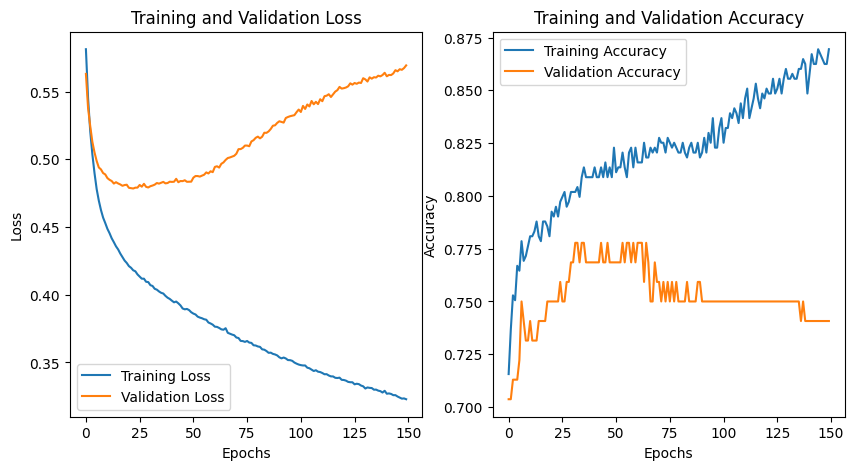

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

***PREDICTIONS ON NEW DATA***

In [57]:
feature_names=['Pregnancies',	'Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
new_data = []
for feature in feature_names:  # Assuming 8 features
    value = float(input(f"Enter value for {feature}:"))
    new_data.append(value)

# Convert the user input to a NumPy array
x_new = np.array([new_data])

# Make predictions for the new values
ypred_new = (model.predict(x_new) > 0.5).astype(int)

# Display the prediction for the new values
print("\nPrediction for New Values:")
print(ypred_new)

Enter value for Pregnancies:4
Enter value for Glucose:178
Enter value for BloodPressure:120
Enter value for SkinThickness:23
Enter value for Insulin:290
Enter value for BMI:27
Enter value for DiabetesPedigreeFunction:32
Enter value for Age:87
1/1 [==============================] - 0s 21ms/step

Prediction for New Values:
[[1]]
